<a href="https://colab.research.google.com/github/Fvargasv/Challenge-Telecom-X-Parte-2/blob/main/Telecom_X_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparación de los datos

##Extracción del archivo tratado

In [63]:
import pandas as pd

datos = pd.read_csv("/content/datos_telecomx_parte2.csv")
datos.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Charges_Dayly
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


##Eliminación de columnas irrelevantes

In [64]:
datos.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total',
       'Charges_Dayly'],
      dtype='object')

In [65]:
#Eliminamos la columna customerID, ya que no entrega información útil que influya en la decisión de quedarse o irse de la compañía
datos = datos.drop(['customerID'], axis=1)
datos.head()

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Charges_Dayly
0,0,Female,0,1,1,9,1,No,DSL,No,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0,Male,0,0,0,9,1,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1,Male,0,0,0,4,1,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1,Male,1,1,0,13,1,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1,Female,1,1,0,3,1,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


##Reducir redundancia

Se limpiarán los datos agrupando algunos valores de las variables, ya que se detectaron correlaciones de 1 en muchas variables, al hacer el encoding antes de separar las variables explicativas (X) de la objetivo (y)

In [67]:
datos_clean = datos.copy()
datos_clean.head()

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Charges_Dayly
0,0,Female,0,1,1,9,1,No,DSL,No,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0,Male,0,0,0,9,1,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1,Male,0,0,0,4,1,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1,Male,1,1,0,13,1,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1,Female,1,1,0,3,1,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [68]:
cols_to_fix = ['internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies']

In [69]:
for col in cols_to_fix:
  datos_clean[col] = datos_clean[col].replace({'No internet service': 'No'})


In [70]:
#verificamos si hay valores únicos en cada columna
for col in datos_clean.columns:
  print(f"Valores únicos en la columna'{col}': {datos_clean[col].nunique()}")
  print(datos_clean[col].unique())
  print('-'*60)

Valores únicos en la columna'Churn': 2
[0 1]
------------------------------------------------------------
Valores únicos en la columna'customer_gender': 2
['Female' 'Male']
------------------------------------------------------------
Valores únicos en la columna'customer_SeniorCitizen': 2
[0 1]
------------------------------------------------------------
Valores únicos en la columna'customer_Partner': 2
[1 0]
------------------------------------------------------------
Valores únicos en la columna'customer_Dependents': 2
[1 0]
------------------------------------------------------------
Valores únicos en la columna'customer_tenure': 73
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
------------------------------------------------------------
Valores únicos en la columna'phone_PhoneService': 2
[1 0]
-------------

In [71]:
datos_clean.head()

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Charges_Dayly
0,0,Female,0,1,1,9,1,No,DSL,No,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0,Male,0,0,0,9,1,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1,Male,0,0,0,4,1,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1,Male,1,1,0,13,1,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1,Female,1,1,0,3,1,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


##Encoding

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.




In [90]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [72]:
columnas = datos_clean.columns
columnas

Index(['Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total',
       'Charges_Dayly'],
      dtype='object')

In [73]:
columnas_categoricas = datos.select_dtypes(include=['object']).columns
columnas_categoricas

Index(['customer_gender', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'Contract',
       'PaymentMethod'],
      dtype='object')

In [38]:
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),
                                  ['customer_gender', 'phone_MultipleLines', 'internet_InternetService',
                                   'internet_OnlineSecurity', 'internet_OnlineBackup',
                                    'internet_DeviceProtection', 'internet_TechSupport',
                                    'internet_StreamingTV', 'internet_StreamingMovies', 'Contract',
                                    'PaymentMethod']),
                                  remainder='passthrough',
                                  sparse_threshold=0,
                                  force_int_remainder_cols=False)

In [74]:
datos= one_hot.fit_transform(datos_clean)

In [75]:
datos=pd.DataFrame(datos, columns=one_hot.get_feature_names_out(columnas))
datos.head()

,onehotencoder__customer_gender_Male,onehotencoder__phone_MultipleLines_No,onehotencoder__phone_MultipleLines_No phone service,onehotencoder__phone_MultipleLines_Yes,onehotencoder__internet_InternetService_DSL,onehotencoder__internet_InternetService_Fiber optic,onehotencoder__internet_InternetService_No,onehotencoder__internet_OnlineSecurity_Yes,onehotencoder__internet_OnlineBackup_Yes,onehotencoder__internet_DeviceProtection_Yes,...,remainder__Churn,remainder__customer_SeniorCitizen,remainder__customer_Partner,remainder__customer_Dependents,remainder__customer_tenure,remainder__phone_PhoneService,remainder__PaperlessBilling,remainder__Charges_Monthly,remainder__Charges_Total,remainder__Charges_Dayly
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,9.0,1.0,1.0,65.6,593.30,2.186667
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,1.0,0.0,59.9,542.40,1.996667
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,4.0,1.0,1.0,73.9,280.85,2.463333
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,13.0,1.0,1.0,98.0,1237.85,3.266667
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,3.0,1.0,1.0,83.9,267.40,2.796667


In [91]:
#Se cambia el nombre de las columnas para mejor comprensión
datos.columns.to_list()

['onehotencoder__customer_gender_Male',
 'onehotencoder__phone_MultipleLines_No',
 'onehotencoder__phone_MultipleLines_No phone service',
 'onehotencoder__phone_MultipleLines_Yes',
 'onehotencoder__internet_InternetService_DSL',
 'onehotencoder__internet_InternetService_Fiber optic',
 'onehotencoder__internet_InternetService_No',
 'onehotencoder__internet_OnlineSecurity_Yes',
 'onehotencoder__internet_OnlineBackup_Yes',
 'onehotencoder__internet_DeviceProtection_Yes',
 'onehotencoder__internet_TechSupport_Yes',
 'onehotencoder__internet_StreamingTV_Yes',
 'onehotencoder__internet_StreamingMovies_Yes',
 'onehotencoder__Contract_Month-to-month',
 'onehotencoder__Contract_One year',
 'onehotencoder__Contract_Two year',
 'onehotencoder__PaymentMethod_Bank transfer (automatic)',
 'onehotencoder__PaymentMethod_Credit card (automatic)',
 'onehotencoder__PaymentMethod_Electronic check',
 'onehotencoder__PaymentMethod_Mailed check',
 'remainder__Churn',
 'remainder__customer_SeniorCitizen',
 'r

In [92]:
new_columns = ['customer_gender_Male',
 'phone_MultipleLines_No',
 'phone_MultipleLines_No phone service',
 'phone_MultipleLines_Yes',
 'internet_InternetService_DSL',
 'internet_InternetService_Fiber optic',
 'internet_InternetService_No',
 'internet_OnlineSecurity_Yes',
 'internet_OnlineBackup_Yes',
 'internet_DeviceProtection_Yes',
 'internet_TechSupport_Yes',
 'internet_StreamingTV_Yes',
 'internet_StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'Churn',
 'customer_SeniorCitizen',
 'customer_Partner',
 'customer_Dependents',
 'customer_tenure',
 'phone_PhoneService',
 'PaperlessBilling',
 'Charges_Monthly',
 'Charges_Total',
 'Charges_Dayly']

In [93]:
datos.columns = ['customer_gender_Male',
 'phone_MultipleLines_No',
 'phone_MultipleLines_No phone service',
 'phone_MultipleLines_Yes',
 'internet_InternetService_DSL',
 'internet_InternetService_Fiber optic',
 'internet_InternetService_No',
 'internet_OnlineSecurity_Yes',
 'internet_OnlineBackup_Yes',
 'internet_DeviceProtection_Yes',
 'internet_TechSupport_Yes',
 'internet_StreamingTV_Yes',
 'internet_StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'Churn',
 'customer_SeniorCitizen',
 'customer_Partner',
 'customer_Dependents',
 'customer_tenure',
 'phone_PhoneService',
 'PaperlessBilling',
 'Charges_Monthly',
 'Charges_Total',
 'Charges_Dayly']
datos.head()

,customer_gender_Male,phone_MultipleLines_No,phone_MultipleLines_No phone service,phone_MultipleLines_Yes,internet_InternetService_DSL,internet_InternetService_Fiber optic,internet_InternetService_No,internet_OnlineSecurity_Yes,internet_OnlineBackup_Yes,internet_DeviceProtection_Yes,...,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,PaperlessBilling,Charges_Monthly,Charges_Total,Charges_Dayly
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,9.0,1.0,1.0,65.6,593.30,2.186667
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,1.0,0.0,59.9,542.40,1.996667
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,4.0,1.0,1.0,73.9,280.85,2.463333
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,13.0,1.0,1.0,98.0,1237.85,3.266667
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,3.0,1.0,1.0,83.9,267.40,2.796667


In [94]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customer_gender_Male                     7032 non-null   float64
 1   phone_MultipleLines_No                   7032 non-null   float64
 2   phone_MultipleLines_No phone service     7032 non-null   float64
 3   phone_MultipleLines_Yes                  7032 non-null   float64
 4   internet_InternetService_DSL             7032 non-null   float64
 5   internet_InternetService_Fiber optic     7032 non-null   float64
 6   internet_InternetService_No              7032 non-null   float64
 7   internet_OnlineSecurity_Yes              7032 non-null   float64
 8   internet_OnlineBackup_Yes                7032 non-null   float64
 9   internet_DeviceProtection_Yes            7032 non-null   float64
 10  internet_TechSupport_Yes                 7032 non-nul

In [96]:
print(datos.isna().sum())

customer_gender_Male                       0
phone_MultipleLines_No                     0
phone_MultipleLines_No phone service       0
phone_MultipleLines_Yes                    0
internet_InternetService_DSL               0
internet_InternetService_Fiber optic       0
internet_InternetService_No                0
internet_OnlineSecurity_Yes                0
internet_OnlineBackup_Yes                  0
internet_DeviceProtection_Yes              0
internet_TechSupport_Yes                   0
internet_StreamingTV_Yes                   0
internet_StreamingMovies_Yes               0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
Churn                                      0
customer_SeniorCitizen                     0
customer_P

In [97]:
print(datos.isnull().sum())

customer_gender_Male                       0
phone_MultipleLines_No                     0
phone_MultipleLines_No phone service       0
phone_MultipleLines_Yes                    0
internet_InternetService_DSL               0
internet_InternetService_Fiber optic       0
internet_InternetService_No                0
internet_OnlineSecurity_Yes                0
internet_OnlineBackup_Yes                  0
internet_DeviceProtection_Yes              0
internet_TechSupport_Yes                   0
internet_StreamingTV_Yes                   0
internet_StreamingMovies_Yes               0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
Churn                                      0
customer_SeniorCitizen                     0
customer_P

In [98]:
#botamos los registros que tienen datos nulos, ya que son sólo 11
datos = datos.dropna()

In [99]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customer_gender_Male                     7032 non-null   float64
 1   phone_MultipleLines_No                   7032 non-null   float64
 2   phone_MultipleLines_No phone service     7032 non-null   float64
 3   phone_MultipleLines_Yes                  7032 non-null   float64
 4   internet_InternetService_DSL             7032 non-null   float64
 5   internet_InternetService_Fiber optic     7032 non-null   float64
 6   internet_InternetService_No              7032 non-null   float64
 7   internet_OnlineSecurity_Yes              7032 non-null   float64
 8   internet_OnlineBackup_Yes                7032 non-null   float64
 9   internet_DeviceProtection_Yes            7032 non-null   float64
 10  internet_TechSupport_Yes                 7032 non-nul

In [100]:
#Verificación datos nulos
print(datos.isnull().sum())

customer_gender_Male                       0
phone_MultipleLines_No                     0
phone_MultipleLines_No phone service       0
phone_MultipleLines_Yes                    0
internet_InternetService_DSL               0
internet_InternetService_Fiber optic       0
internet_InternetService_No                0
internet_OnlineSecurity_Yes                0
internet_OnlineBackup_Yes                  0
internet_DeviceProtection_Yes              0
internet_TechSupport_Yes                   0
internet_StreamingTV_Yes                   0
internet_StreamingMovies_Yes               0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
Churn                                      0
customer_SeniorCitizen                     0
customer_P

In [101]:
#verificación de datos infinitos
import numpy as np
print(np.isinf(datos).sum())

customer_gender_Male                       0
phone_MultipleLines_No                     0
phone_MultipleLines_No phone service       0
phone_MultipleLines_Yes                    0
internet_InternetService_DSL               0
internet_InternetService_Fiber optic       0
internet_InternetService_No                0
internet_OnlineSecurity_Yes                0
internet_OnlineBackup_Yes                  0
internet_DeviceProtection_Yes              0
internet_TechSupport_Yes                   0
internet_StreamingTV_Yes                   0
internet_StreamingMovies_Yes               0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
Churn                                      0
customer_SeniorCitizen                     0
customer_P

In [102]:
#Varificación String vacias
print((datos=='').sum())

customer_gender_Male                       0
phone_MultipleLines_No                     0
phone_MultipleLines_No phone service       0
phone_MultipleLines_Yes                    0
internet_InternetService_DSL               0
internet_InternetService_Fiber optic       0
internet_InternetService_No                0
internet_OnlineSecurity_Yes                0
internet_OnlineBackup_Yes                  0
internet_DeviceProtection_Yes              0
internet_TechSupport_Yes                   0
internet_StreamingTV_Yes                   0
internet_StreamingMovies_Yes               0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
Churn                                      0
customer_SeniorCitizen                     0
customer_P

In [103]:
#Verificación String espacios
print((datos==' ').sum())

customer_gender_Male                       0
phone_MultipleLines_No                     0
phone_MultipleLines_No phone service       0
phone_MultipleLines_Yes                    0
internet_InternetService_DSL               0
internet_InternetService_Fiber optic       0
internet_InternetService_No                0
internet_OnlineSecurity_Yes                0
internet_OnlineBackup_Yes                  0
internet_DeviceProtection_Yes              0
internet_TechSupport_Yes                   0
internet_StreamingTV_Yes                   0
internet_StreamingMovies_Yes               0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
Churn                                      0
customer_SeniorCitizen                     0
customer_P

##Análisis de correlación

<Axes: >

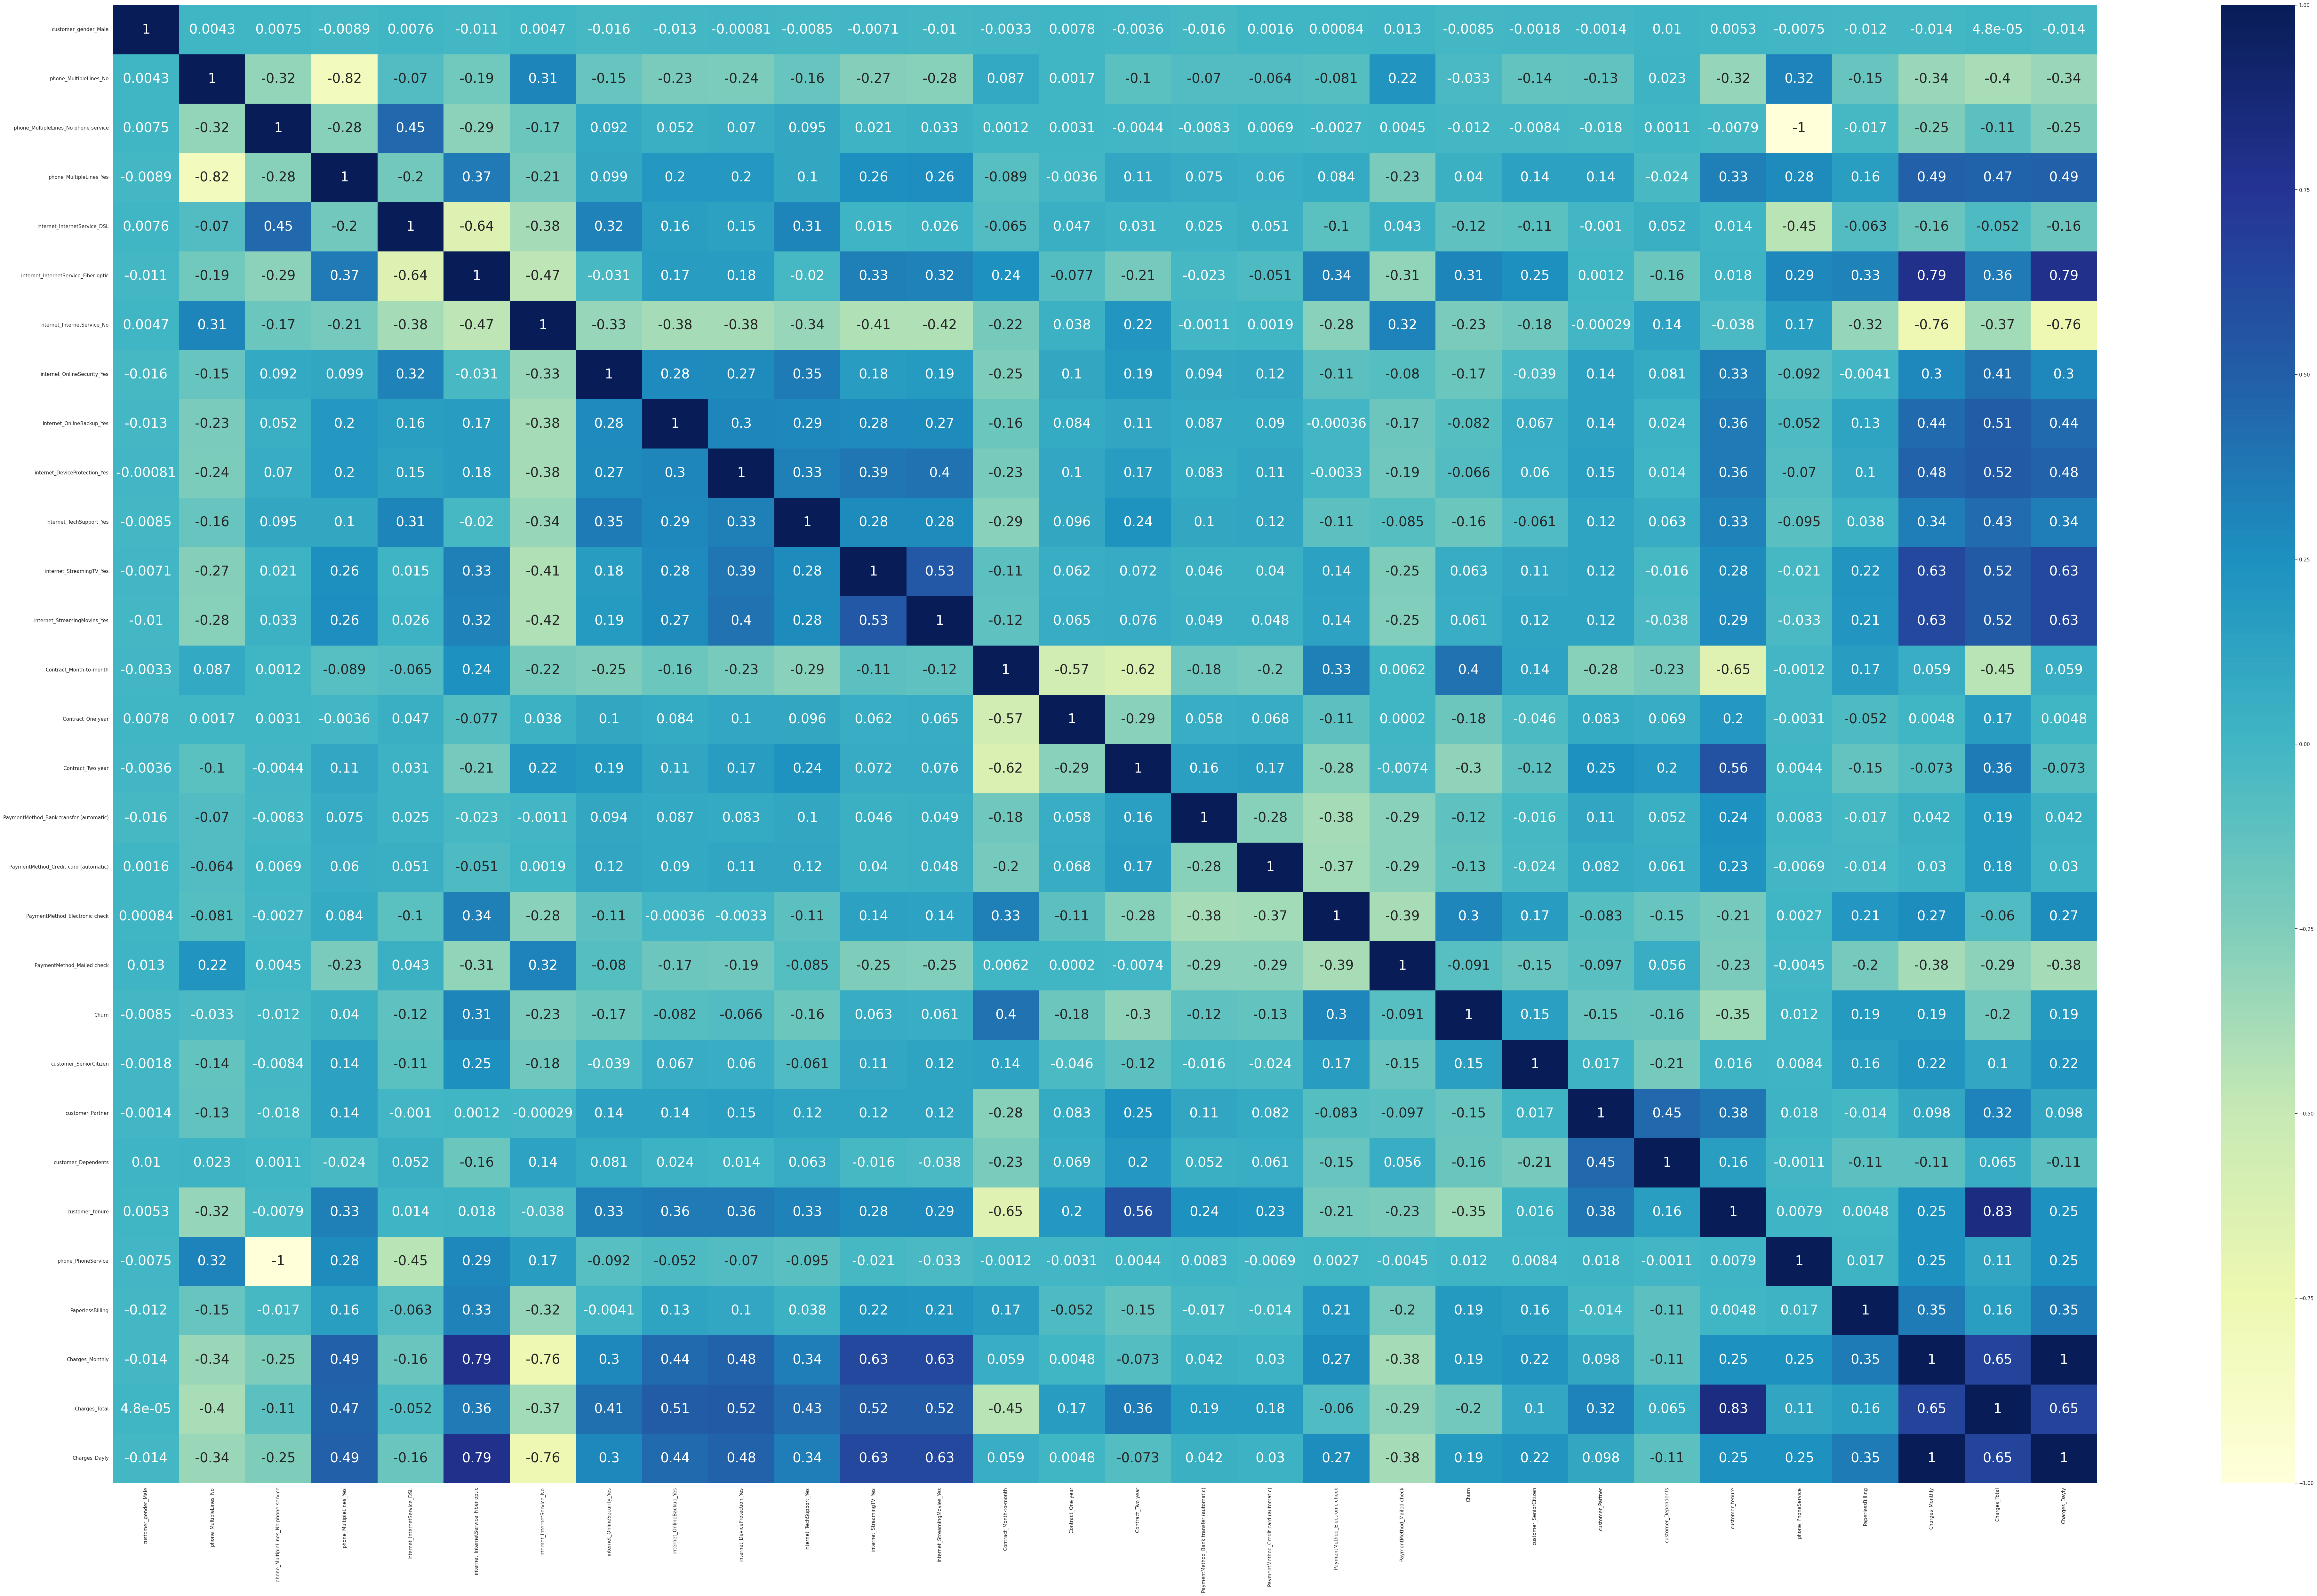

In [104]:
import seaborn as sb
sb.set(rc={'figure.figsize':(100,60)})
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu", annot_kws={"size": 30})

##Análisis de multicolinearidad entre variables

In [105]:
datos.corr()['Churn'].sort_values(ascending=False)

,Churn
Churn,1.000000
Contract_Month-to-month,0.404565
internet_InternetService_Fiber optic,0.307463
PaymentMethod_Electronic check,0.301455
Charges_Dayly,0.192858
Charges_Monthly,0.192858
PaperlessBilling,0.191454
customer_SeniorCitizen,0.150541
internet_StreamingTV_Yes,0.063254
internet_StreamingMovies_Yes,0.060860


##Variables explicativas y variable respuesta

In [6]:
X= datos.drop(['Churn'], axis=1)
y= datos['Churn']

In [7]:
X

,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Charges_Dayly
0,Female,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30,2.186667
1,Male,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,Male,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,Male,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,Female,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,0,0,13,1,No,DSL,Yes,No,No,Yes,No,No,One year,0,Mailed check,55.15,742.90,1.838333
7039,Male,0,1,0,22,1,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7040,Male,0,0,0,2,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7041,Male,0,1,1,67,1,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65,2.261667


In [8]:
y

,Churn
0,0
1,0
2,1
3,1
4,1
...,...
7038,0
7039,1
7040,0
7041,0


In [19]:
# utiliza el método LabelEncoder para realizar la transformación de
# la variable churn, ya que es CATEGORICA

#from sklearn.preprocessing import LabelEncoder

In [20]:
#label_encoder = LabelEncoder()

In [21]:
#y = label_encoder.fit_transform(y)

In [22]:
#y

array([0, 0, 1, ..., 0, 0, 0])

In [23]:
#y.dtype

dtype('int64')

##Verificación de la Proporción de Cancelación (Churn)

In [24]:
datos['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [25]:
datos['Churn'].value_counts(normalize=True).round(2)

,proportion
Churn,
0,0.73
1,0.27


Se ve que hay un desbalance entre la proporción de clientes que cancelaron (27%) vs los que permanecen activos (73%)

##Balanceo de Clases

Se usará oversampling con el método SMOTE

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
oversampling = SMOTE(random_state=42)
x_balanceada, y_balanceada = oversampling.fit_resample(X,y)

In [28]:
y_balanceada.size

10348

In [29]:
x_balanceada.shape

(10348, 41)

##Normalización

Some algorithms that need data on the same scale: KNN (K-Nearest Neighbors), Neural Networks, Linear Regression, Logistic Regression and SVM.

Some algorithms that do not need data on the same scale: Decision Trees, Random Forest, AdaBoost, Naïve Bayes, etc.

Se utilizarán 3 modelos KNN, Decision Trees y Random Forest, por lo que se normalizarán los datos para usar KNN, esto debido a la diferencia de escala entre variables con valores 0 y 1 y la variable Charges_Total que tiene un máximo de 8684.

Para los modelos, se utilizarán datos sin normalizar

In [30]:
datos.describe()

,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,PaperlessBilling,Charges_Monthly,Charges_Total,Charges_Dayly
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2283.300441,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [31]:
#normalización de la base de datos usando el MinMaxScaler.
from sklearn.preprocessing import MinMaxScaler

In [32]:
normalizacion = MinMaxScaler()
X_normalizado = normalizacion.fit_transform(X)

In [33]:
pd.DataFrame(X_normalizado)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.125000,1.0,1.0,0.471144,0.066294,0.471144
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.125000,1.0,0.0,0.414428,0.060420,0.414428
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.055556,1.0,1.0,0.553731,0.030239,0.553731
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.180556,1.0,1.0,0.793532,0.140670,0.793532
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.041667,1.0,1.0,0.653234,0.028687,0.653234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.180556,1.0,0.0,0.367164,0.083556,0.367164
7039,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.305556,1.0,1.0,0.665174,0.214043,0.665174
7040,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.027778,1.0,1.0,0.318905,0.008533,0.318905
7041,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.930556,1.0,0.0,0.493532,0.531831,0.493532
